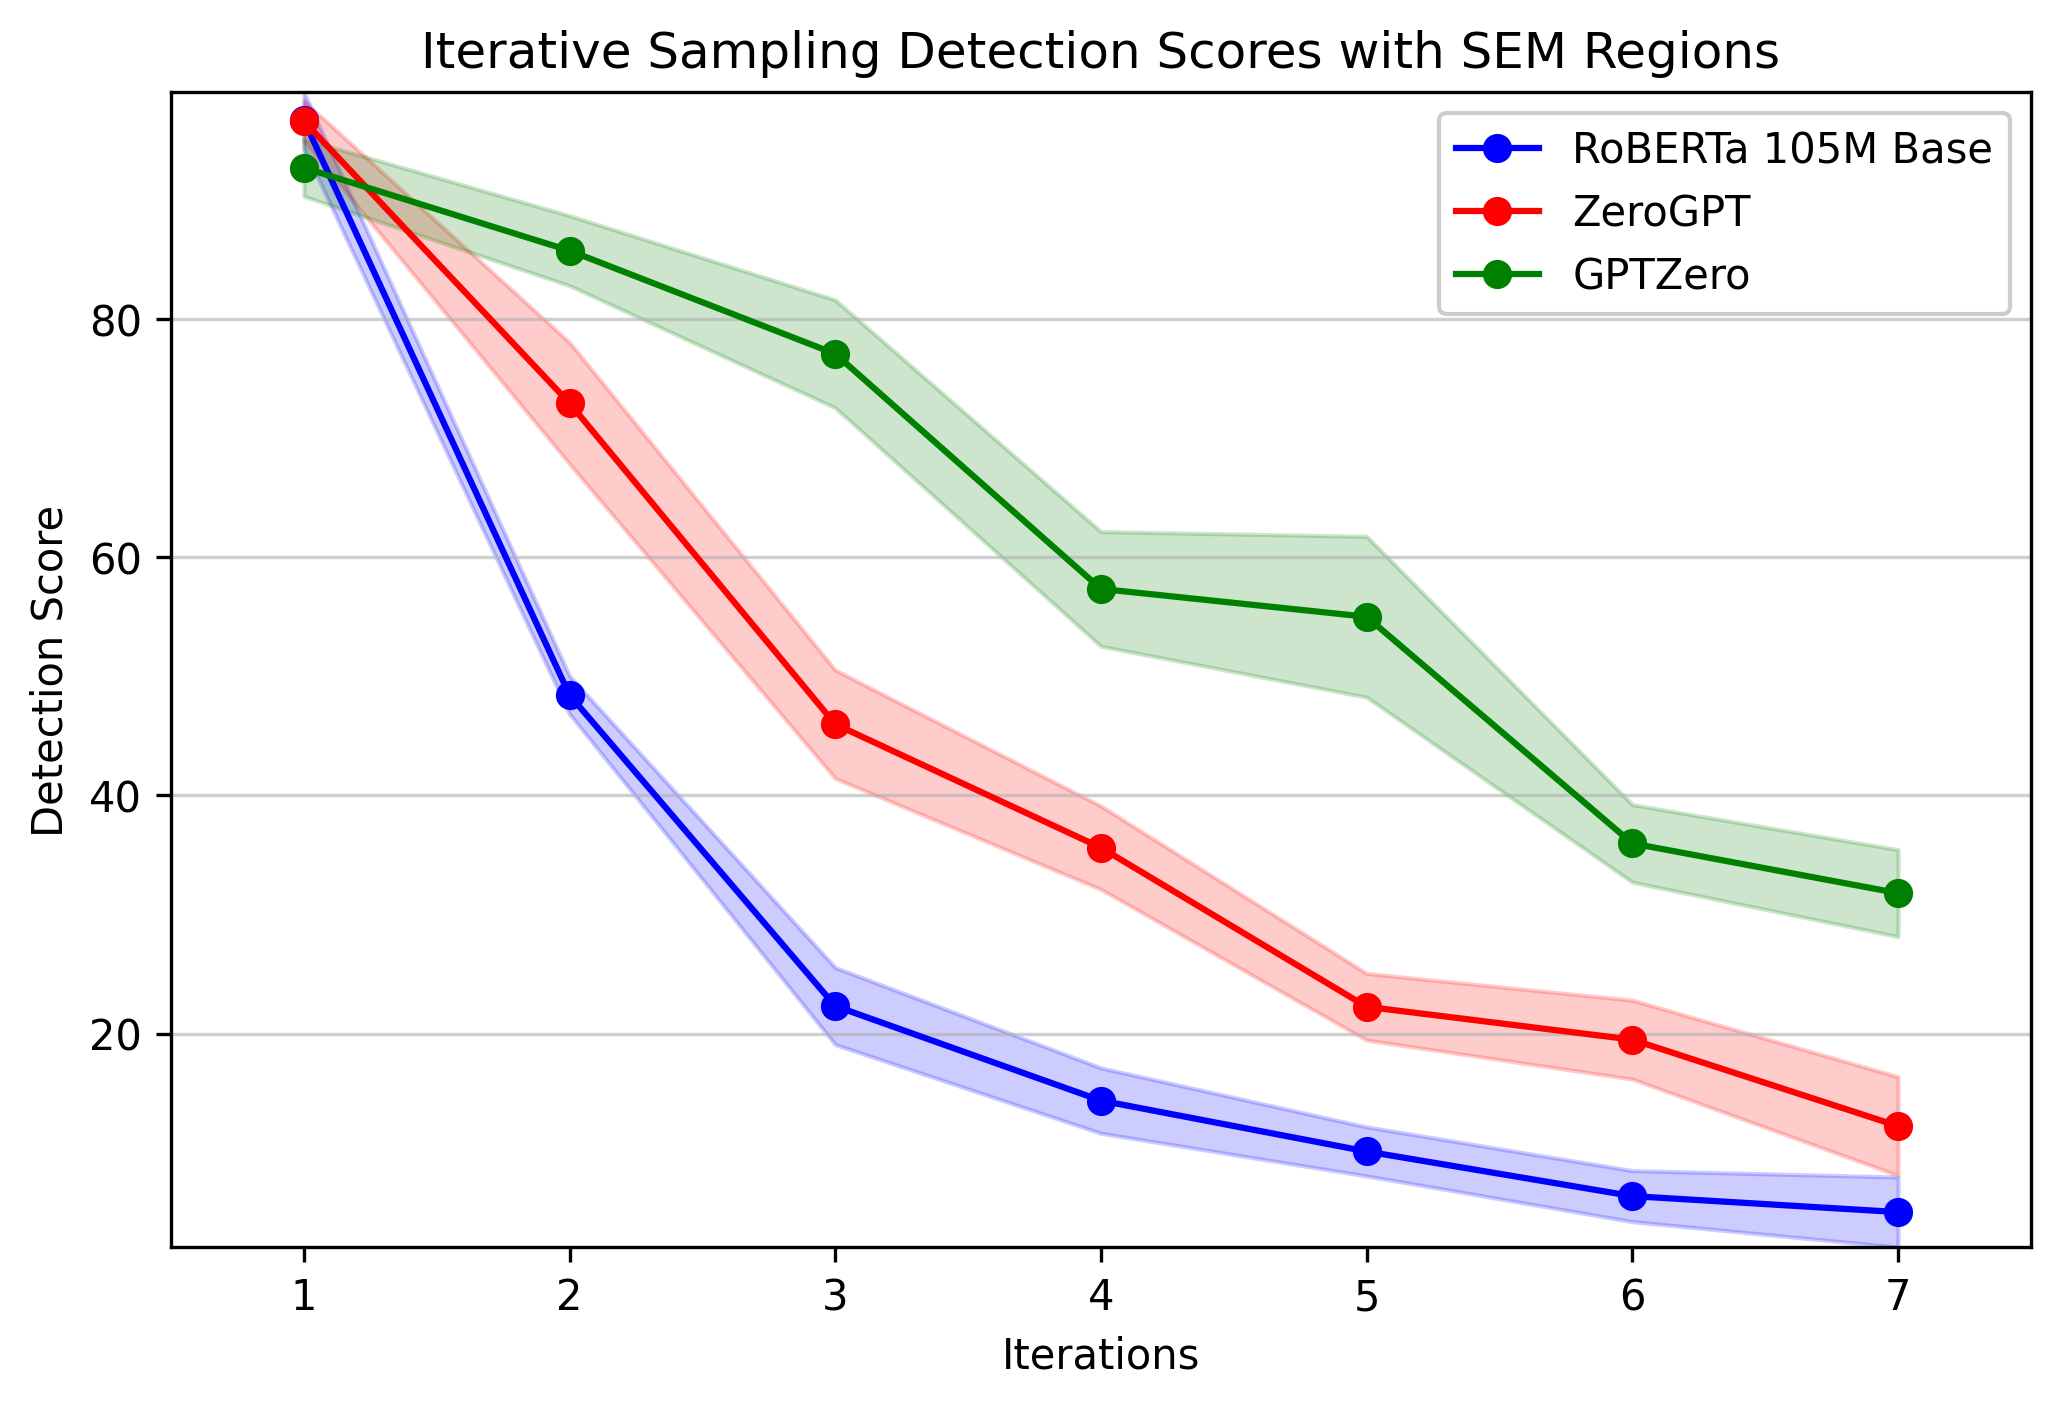

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate integer X values (iterations 1 to 7)
x = np.arange(1, 8, 1)
num_samples = 10  # Number of detection scores per iteration

# Function to generate detection scores with exponential decay
def generate_y_samples(initial, decay_factor, noise_level, num_samples):
    samples = []
    for i in range(len(x)):  # Iterate over each iteration
        base_y = initial * (decay_factor ** i)  # Compute base value for iteration i
        noise = np.random.normal(0, noise_level, num_samples)  # Generate noise
        y = base_y + noise  # Apply noise
        samples.append(np.clip(y, 0, 100))  # Clip values within 0-100
    return np.array(samples)  # Return as NumPy array

# Generate Y samples for all three conditions
y_blue_samples = generate_y_samples(100, 0.5, 10, num_samples)  # RoBERTa 105M Base (Fast decay)
y_red_samples = generate_y_samples(100, 0.7, 13, num_samples)   # ZeroGPT (Slower decay)
y_green_samples = generate_y_samples(100, 0.85, 15, num_samples)  # GPTZero (Slowest decay)

# Compute means and standard error of the mean (SEM)
def compute_stats(y_samples):
    means = np.mean(y_samples, axis=1)
    sems = np.std(y_samples, axis=1, ddof=1) / np.sqrt(num_samples)  # SEM calculation
    return means, sems

means_blue, sems_blue = compute_stats(y_blue_samples)
means_red, sems_red = compute_stats(y_red_samples)
means_green, sems_green = compute_stats(y_green_samples)

# Create the plot
plt.figure(figsize=(8, 5), dpi=300)

# Plot means with shaded SEM regions
plt.plot(x, means_blue, '-o', color='blue', label="RoBERTa 105M Base")
plt.fill_between(x, means_blue - sems_blue, means_blue + sems_blue, color='blue', alpha=0.2)

plt.plot(x, means_red, '-o', color='red', label="ZeroGPT")
plt.fill_between(x, means_red - sems_red, means_red + sems_red, color='red', alpha=0.2)

plt.plot(x, means_green, '-o', color='green', label="GPTZero")
plt.fill_between(x, means_green - sems_green, means_green + sems_green, color='green', alpha=0.2)

# Labels and title
plt.xlabel("Iterations")
plt.ylabel("Detection Score")
plt.title("Iterative Sampling Detection Scores")
plt.legend(loc="upper right", framealpha=1)

# Adjust x-axis ticks
plt.xticks(x, [f"{i}" for i in x])

# Remove margins and show grid
plt.margins(0)
plt.xlim(min(x) - 0.5, max(x) + 0.5)
plt.grid(True, axis='y', linestyle="-", alpha=0.6)

# Save high-resolution image
plt.savefig("isampling_test_sem.png", dpi=300, bbox_inches='tight')

# Show plot
plt.show()
